**Loan Prediction Machine Learning Model**

**The Problem is,**

In a Simple Term, Bank wants to make automate the Loan Eligibility Process in a real time scenario related to customer's detail provided while applying application for home loan forms.

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**1.Data Gathering**

In [ ]:
loan_train = pd.read_csv("/content/drive/MyDrive/loan-train.csv")
loan_test = pd.read_csv("/content/drive/MyDrive/loan-test.csv")

In [ ]:
loan_train.head(20)

NameError: ignored

**2.Data Cleaning**

In [ ]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_train.shape

(614, 13)

In [ ]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
def Explore_data_type(df,column):

  if df[column].dtype == "object":
    print(df[column].value_counts())

#let test function with given feature in dataset
Explore_data_type(loan_train,"Gender")

Male      489
Female    112
Name: Gender, dtype: int64


In [ ]:
#Now let us find for all column which are object type
for feature_name in loan_train.columns:
  if loan_train[feature_name].dtype == "object":
    print('\n"' + str(feature_name) +'\'s" Value with counts are:')
  Explore_data_type(loan_train ,feature_name)


"Loan_ID's" Value with counts are:
LP001671    1
LP001014    1
LP001432    1
LP001255    1
LP002625    1
           ..
LP002740    1
LP002517    1
LP002734    1
LP002974    1
LP002116    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Value with counts are:
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Value with counts are:
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Value with counts are:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Value with counts are:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Value with counts are:
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Value with counts are:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Value with counts are:
Y    422
N    192
Name: Loan_Status, dtype: int64


In [ ]:
# nall value in the dataset
loan_test.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

**Removing all Null value**

In [ ]:
#Filling all null place by most occure value count in categorical column
loan_train.Gender.fillna(value = "Male",inplace = True)

loan_train.Married.fillna(value = "Yes",inplace = True)

loan_train.Dependents.fillna(value ="0",inplace = True)

loan_train.Education.fillna(value = "Graduate",inplace = True)

loan_train.Self_Employed.fillna(value = "No",inplace = True)

loan_train.Property_Area.fillna(value = "Semiurban",inplace = True)

loan_train.Loan_Status.fillna(value = "Y",inplace = True)

# remove all null value in test dataset
loan_test.Gender.fillna(value ="Male",inplace = True)

loan_test.Dependents.fillna(value = "0",inplace = True)

loan_test.Self_Employed.fillna(value ="No",inplace = True)



In [ ]:
# filling all null value in numeric column of train dataset
loan_train.LoanAmount.fillna(value = loan_train["LoanAmount"].mean(),inplace= True)

loan_train.Loan_Amount_Term.fillna(value = 360.0, inplace= True)

loan_train.Credit_History.fillna(value = 1.0,inplace = True)



In [ ]:
# filling all null value in numeric column of test dataset
loan_test.LoanAmount.fillna(value = loan_test["LoanAmount"].mean(),inplace= True)

loan_test.Loan_Amount_Term.fillna(value = 360.0, inplace= True)

loan_test.Credit_History.fillna(value = 1.0,inplace = True)

In [ ]:
loan_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Visualization**

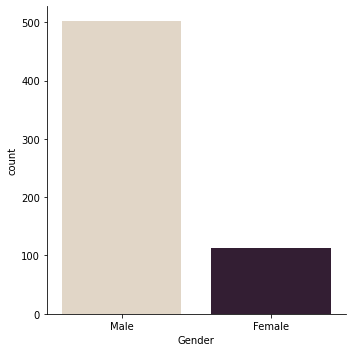

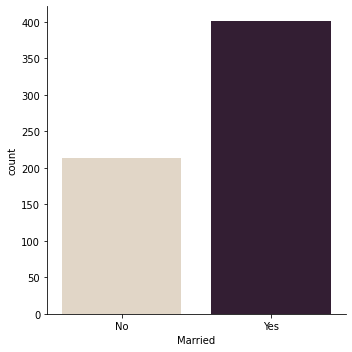

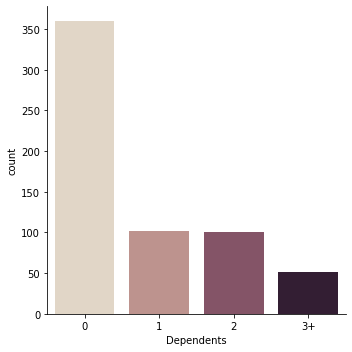

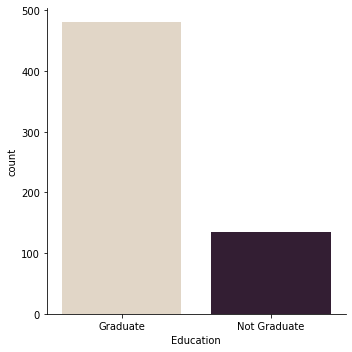

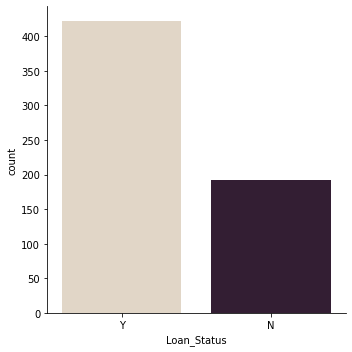

In [ ]:

sns.catplot(x = "Gender",kind="count", palette="ch:.25", data = loan_train)
sns.catplot(x = "Married",kind="count", palette="ch:.25", data = loan_train)
sns.catplot(x = "Dependents",kind="count", palette="ch:.25", data = loan_train)
sns.catplot(x = "Education",kind="count", palette="ch:.25", data = loan_train)
sns.catplot(x = "Loan_Status",kind="count", palette="ch:.25", data = loan_train)

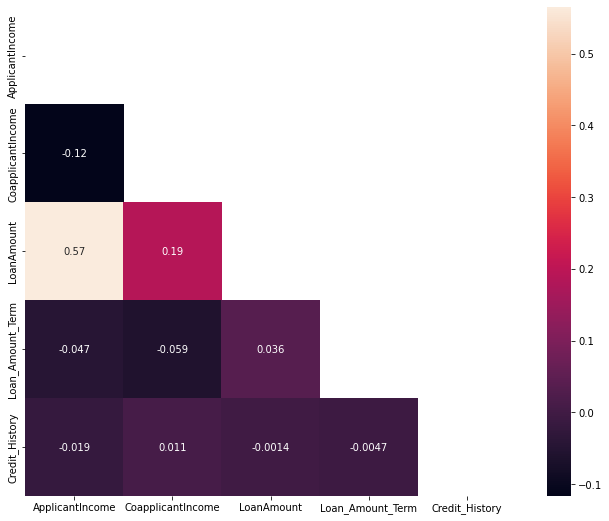

In [ ]:
#Plotting correlation graph for checking relation between features of dataset 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(loan_train.corr(), dtype=bool))

sns.heatmap(loan_train.corr(),mask = mask,annot= True)

**Encoding**

In [ ]:
# Applying label encoding
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [ ]:

loan_train["Gender"] = en.fit_transform(loan_train["Gender"])

loan_test["Gender"] = en.fit_transform(loan_test["Gender"])

loan_train["Married"] = en.fit_transform(loan_train["Married"])

loan_test["Married"] = en.fit_transform(loan_test["Married"])

loan_train["Dependents"] = en.fit_transform(loan_train["Dependents"])

loan_test["Dependents"] = en.fit_transform(loan_test["Dependents"])

loan_train["Education"] = en.fit_transform(loan_train["Education"])

loan_test["Education"] = en.fit_transform(loan_test["Education"])

loan_train["Self_Employed"] = en.fit_transform(loan_train["Self_Employed"])

loan_test["Self_Employed"] = en.fit_transform(loan_test["Self_Employed"])

loan_train["Property_Area"] = en.fit_transform(loan_train["Property_Area"])

loan_test["Property_Area"] = en.fit_transform(loan_test["Property_Area"])

loan_train["Loan_Status"] = en.fit_transform(loan_train["Loan_Status"])
loan_train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


**Normalization**

In [ ]:
#It will scale all value in between 0 to 1
#from sklearn.preprocessing import MinMaxScaler
#mn = MinMaxScaler()
#loan_train.iloc[:,1:-1]= mn.fit_transform(loan_train.iloc[:,1:-1])
#loan_test.iloc[:,1:]= mn.fit_transform(loan_test.iloc[:,1:])

In [ ]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


**Machine Learning Alogorithm**

**Applying Logistic regression**

In [ ]:
X = loan_train.iloc[:,1:-1]
y =loan_train.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size= 0.25,random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression() 
model = lg.fit(X_train,y_train)

In [ ]:
y_train_pred = model.predict(X_train)
#target= lg.predict(loan_test.iloc[:,1:])

**Model is neither overfitted nor underfitted accuracy for train dataset is 80% and for test dataset is 83%**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of train dataset",accuracy_score(y_train_pred,y_train))
print("Accuracy of test dataset",accuracy_score(lg.predict(X_test),y_test))

Accuracy of train dataset 0.8021739130434783
Accuracy of test dataset 0.8376623376623377


In [ ]:
#Output for given train dataset is
Ouput =model.predict(loan_test.iloc[:,1:])
print("Output for train dataset")
Ouput

Output for train dataset


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

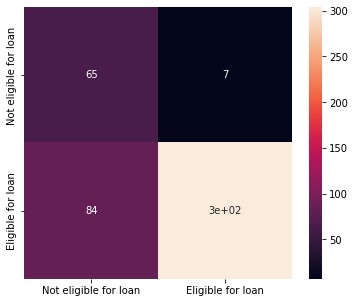

In [ ]:
plt.figure(figsize = (6,5))
sns.heatmap(confusion_matrix(y_train_pred,y_train),annot= True,yticklabels=["Not eligible for loan","Eligible for loan"],xticklabels= ["Not eligible for loan","Eligible for loan"])

In [ ]:
loan_train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [ ]:
loan_train.Loan_Amount_Term.values_count

**Predicting model**

In [ ]:
input_data = [0,0,0,0,0,3510,0,76,360,0,2] # ouput = 1

#convert it into array
input_data = np.array(input_data).reshape(1,-1)

Prediction = model.predict(input_data)


if(Prediction == 1):
  print("You are eligible for loan")
else:
  print("Sorry you are not eligible for loan")


Sorry you are not eligible for loan


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


**Saving the file**

In [ ]:
import pickle
filename = "trained_logistic_model.sav"
pickle.dump(model , open(filename ,"wb"))

#Loading the saved model
loaded_model = pickle.load(open("trained_logistic_model.sav","rb"))

In [ ]:
input_data = [0,0,0,0,0,3510,0,76,360,0,2] # ouput = 1

#convert it into array
input_data = np.array(input_data).reshape(1,-1)

Prediction = loaded_model.predict(input_data)


if(Prediction == 1):
  print("You are eligible for loan")
else:
  print("Sorry you are not eligible for loan")

Sorry you are not eligible for loan


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
